<a href="https://colab.research.google.com/github/ArslanAmanov/AI-ML-DL/blob/default-branch/Kaggle%20Projects%20/UCI%20ML%20drug%20dataset/uci_ml%20drug%20test%20project_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Sentiment Analyses

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# ! pip install nltk

In [1]:
# Importing the Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import nltk.corpus as stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import re
import string
from string import punctuation
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
punctuation = punctuation + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&o'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#UCI ML drug dataset

#Importing the datasets and libraries
url_1_test='https://raw.githubusercontent.com/ArslanAmanov/AI-ML-DL/default-branch/Kaggle%20Projects%20/UCI%20ML%20drug%20dataset/drugsComTest_raw.csv'
url_2_train='https://raw.githubusercontent.com/ArslanAmanov/AI-ML-DL/default-branch/Kaggle%20Projects%20/UCI%20ML%20drug%20dataset/drugsComTrain_raw.csv'
df_test = pd.read_csv(url_1_test)
df_train = pd.read_csv(url_2_train)

print ("The shape of the train set given is : ", df_test.shape)
print ("The shape of the test set given is : ", df_train.shape)

df_train.head() #printing the first 5 rows of the train set

The shape of the train set given is :  (53766, 7)
The shape of the test set given is :  (161297, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
# Data types
print(df_train.dtypes)  # data types of each column in the dataset

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object


In [3]:
#Merging the test and train data
merge = [df_train, df_test]
df_data = pd.concat(merge)

print (df_data.shape)

df_data.head(10)

(215063, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [ ]:
df_data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [4]:
# Null values
print ("Null values in the dataset : ", df_data.isnull().sum(axis = 0))

Null values in the dataset :  uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64


In [ ]:
df_data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [5]:
# Calculating what percentage of data is null

size = df_data.shape[0]

print("Total Size of the dataset : ", size)

total_na = df_data.isnull().sum(axis=0)['condition']
print("Null values", total_na)

print("Percentage of null values : ", (total_na/size)*100)

Total Size of the dataset :  215063
Null values 1194
Percentage of null values :  0.5551861547546533


In [6]:
# Dropping the data points with null values as it's very much less than 5% of the total data points and also the data is not time series data
# so we can drop the data points with null values without any problem
df_data  = df_data.dropna(how='any',axis=0)
print("The shape of the data after dropping the null values is : ",df_data.shape) # printing the shape of the data after dropping the null values

The shape of the data after dropping the null values is :  (213869, 7)


In [7]:
# lowercasing the column names so it will be easier to work with them
df_data.columns = df_data.columns.str.lower()

In [ ]:
df_data.columns

Index(['uniqueid', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount'],
      dtype='object')

In [8]:
# Sorting the dataframe by uniqueID
df_data = df_data.sort_values(by=['uniqueid'])
df_data.reset_index(inplace=True, drop=True)
df_data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,24-Oct-15,3
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,22-Oct-15,6
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,21-Oct-15,2
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,21-Oct-15,5
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,20-Oct-15,2


In [9]:
# Total unique conditions in the dataset
print(df_data['condition'].nunique(), "\n")
print("some of the conditions are: \n", df_data['condition'].unique()[0:10], "\n")

916 

some of the conditions are: 
 ['Abnormal Uterine Bleeding' 'Amenorrhea' 'Birth Control' 'Endometriosis'
 'Endometrial Hyperplasia, Prophylaxis' 'Renal Cell Carcinoma'
 'Not Listed / Othe' 'Eye Redness' 'Benign Prostatic Hyperplasia' 'Acne'] 



In [10]:
# top 10 drugs with rating equals 1
df_data[df_data['rating']==1]['drugname'].value_counts().head(10)

Miconazole                            767
Ethinyl estradiol / norethindrone     728
Etonogestrel                          707
Levonorgestrel                        511
Nexplanon                             504
Ethinyl estradiol / norgestimate      464
Medroxyprogesterone                   443
Depo-Provera                          417
Tioconazole                           410
Ethinyl estradiol / levonorgestrel    385
Name: drugname, dtype: int64

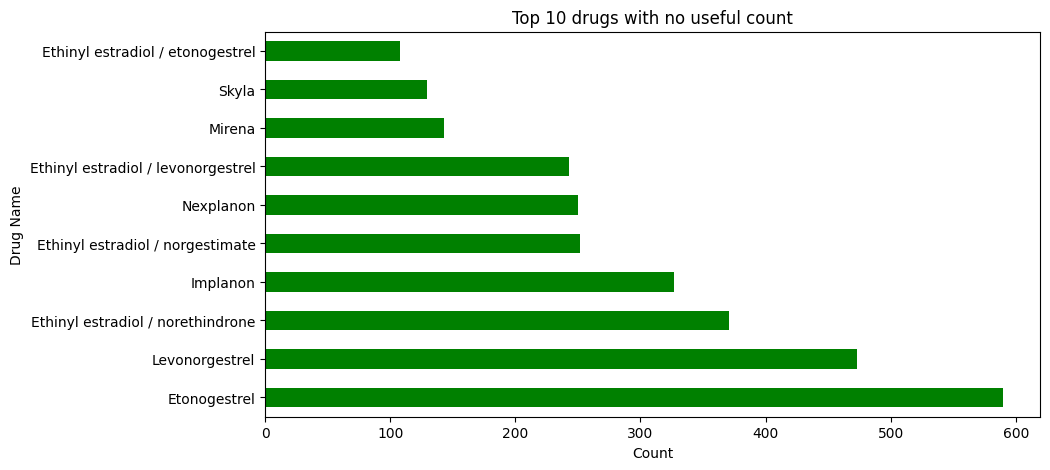

In [11]:
df_data.loc[df_data.usefulcount==0, 'drugname'].value_counts()[:10].plot(kind='barh', figsize=(10,5), color='green')
plt.title('Top 10 drugs with no useful count')
plt.xlabel('Count')
plt.ylabel('Drug Name')
plt.show()

In [12]:
# minimum rating in the dataset
min_rating = min(df_data['rating'])
print(min_rating)

1


In [13]:
# Converting the date in to date time format
df_data['date'] = pd.to_datetime(df_data['date'])

# Exploratory Data Analysis

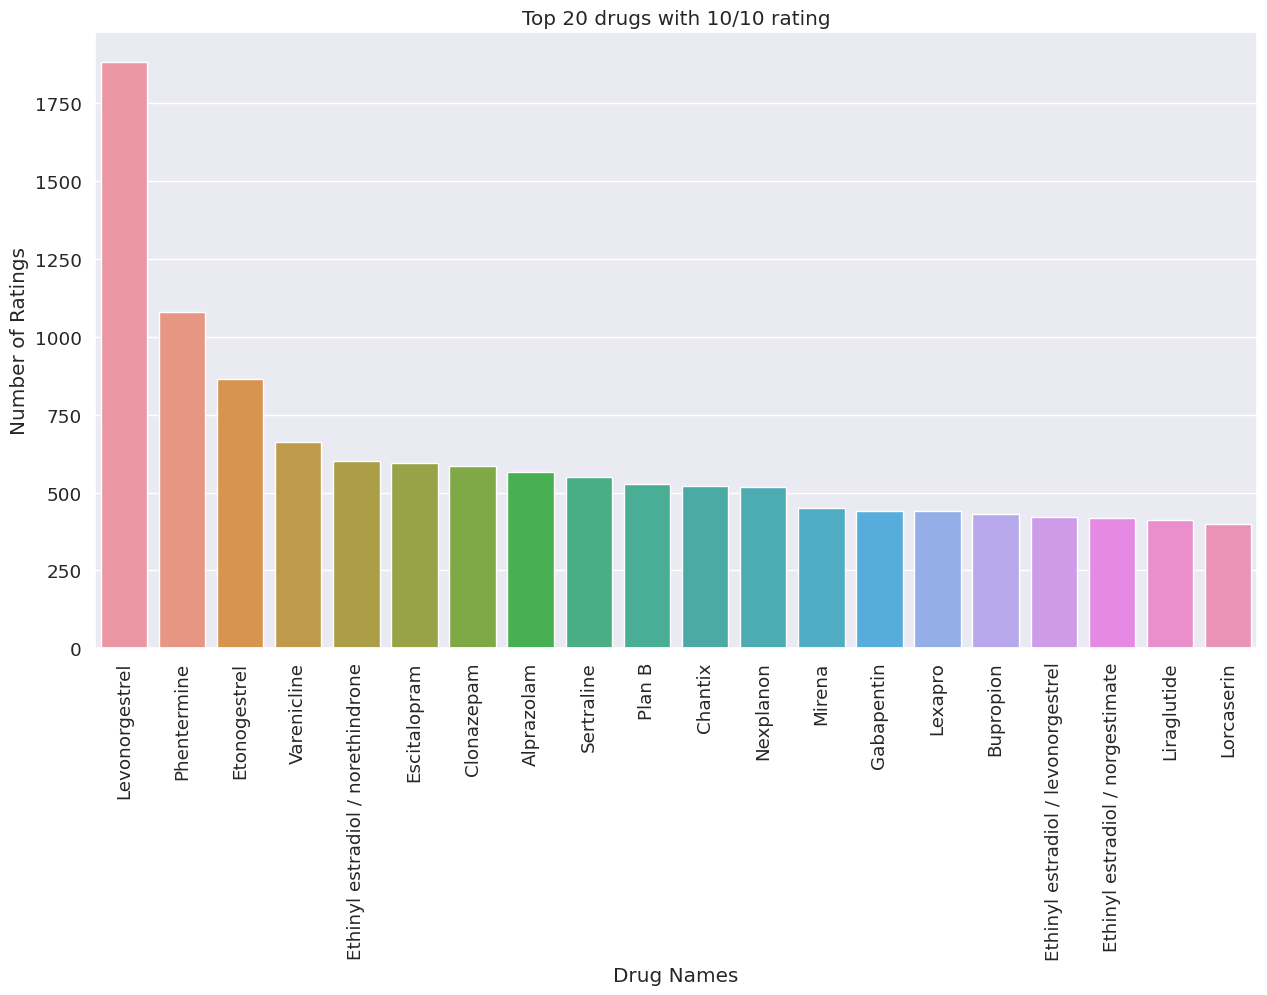

In [14]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameters
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set(title = 'Top 20 drugs with 10/10 rating', ylabel = 'Number of Ratings', xlabel = "Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90); # Rotating the x-axis labels to 90 degrees

Text(0.5, 0, 'Drug name')

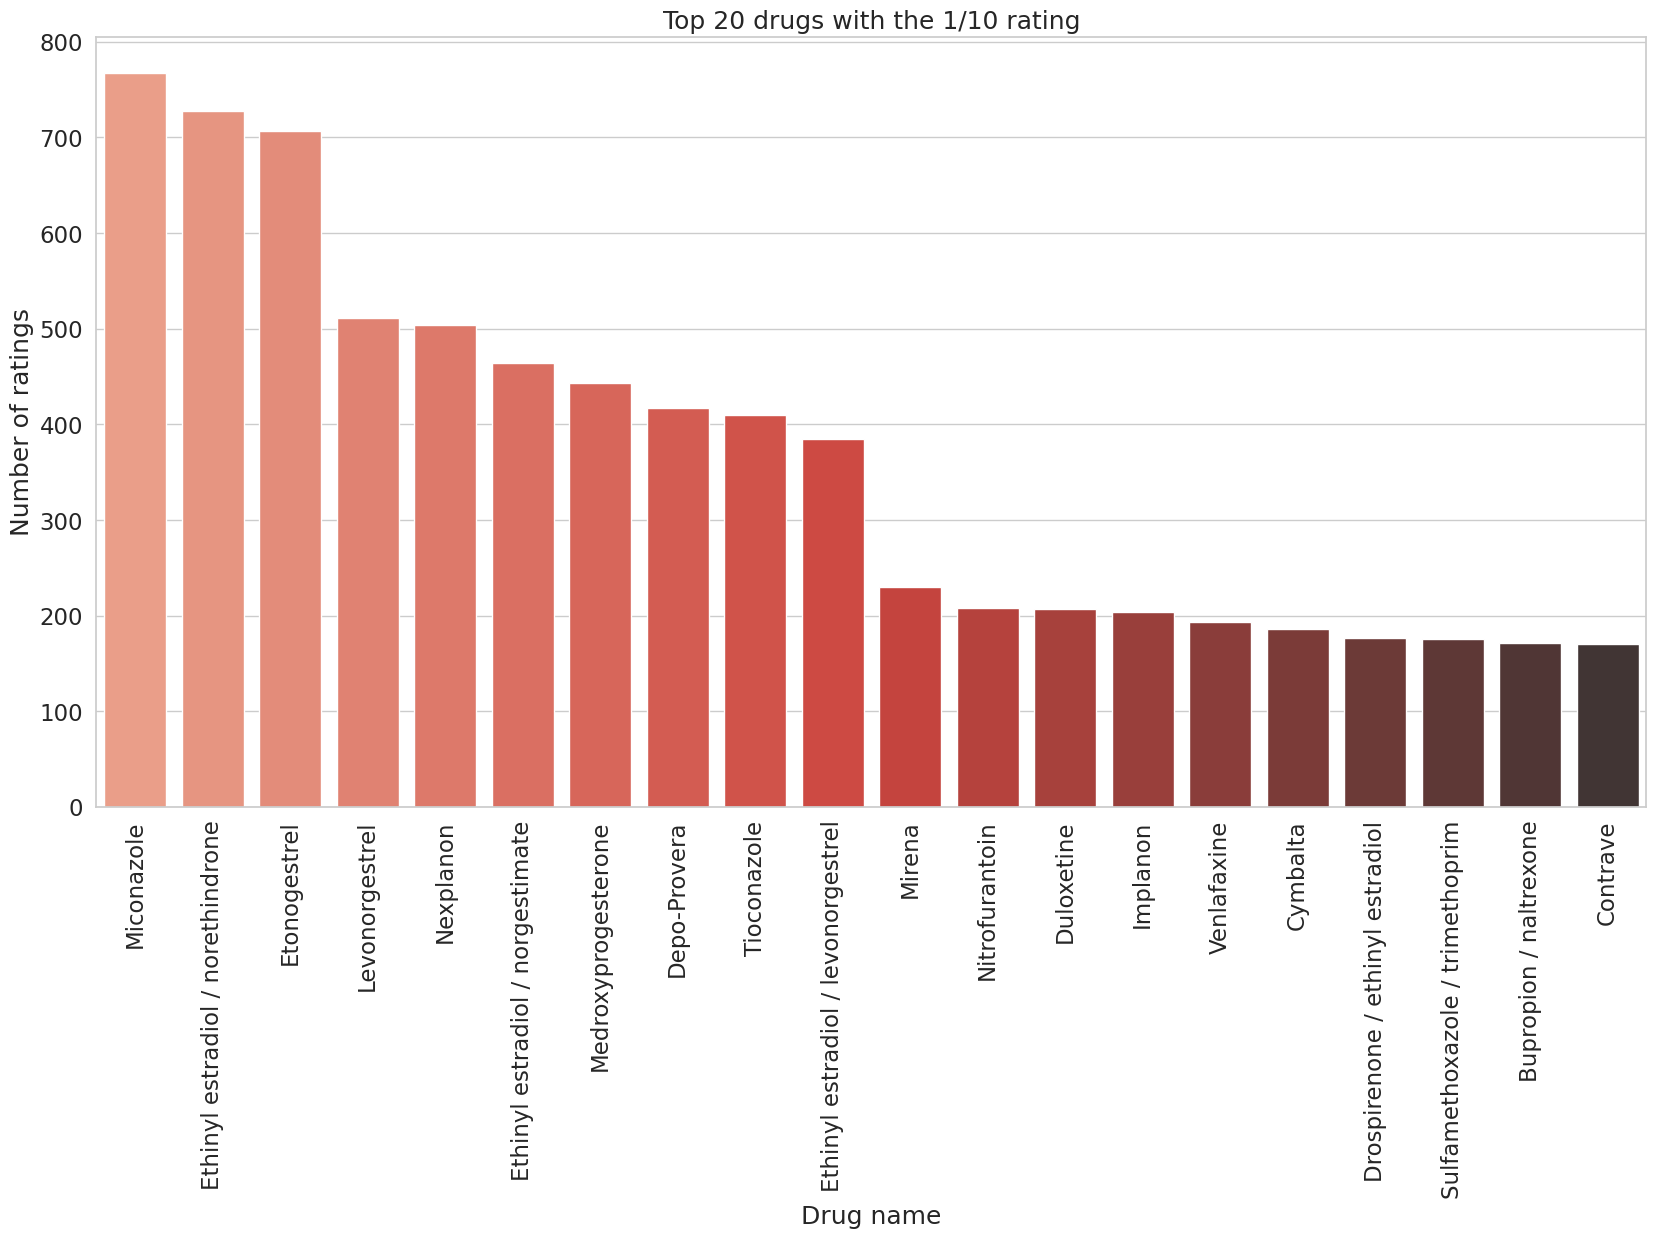

In [15]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# setting parameter
sns.set(font_scale=1.5, style="whitegrid")
plt.rcParams['figure.figsize'] = (20, 10)

rating = dict(df_data.loc[df_data.rating==1, 'drugname'].value_counts())

drugname = list(rating.keys())

sns_rating = sns.barplot(x=drugname[:20], y=list(rating.values())[:20], palette="Reds_d")
sns_rating.set_xticklabels(sns_rating.get_xticklabels(), rotation=90)
sns_rating.set_title("Top 20 drugs with the 1/10 rating")
sns_rating.set_ylabel("Number of ratings")
sns_rating.set_xlabel("Drug name")

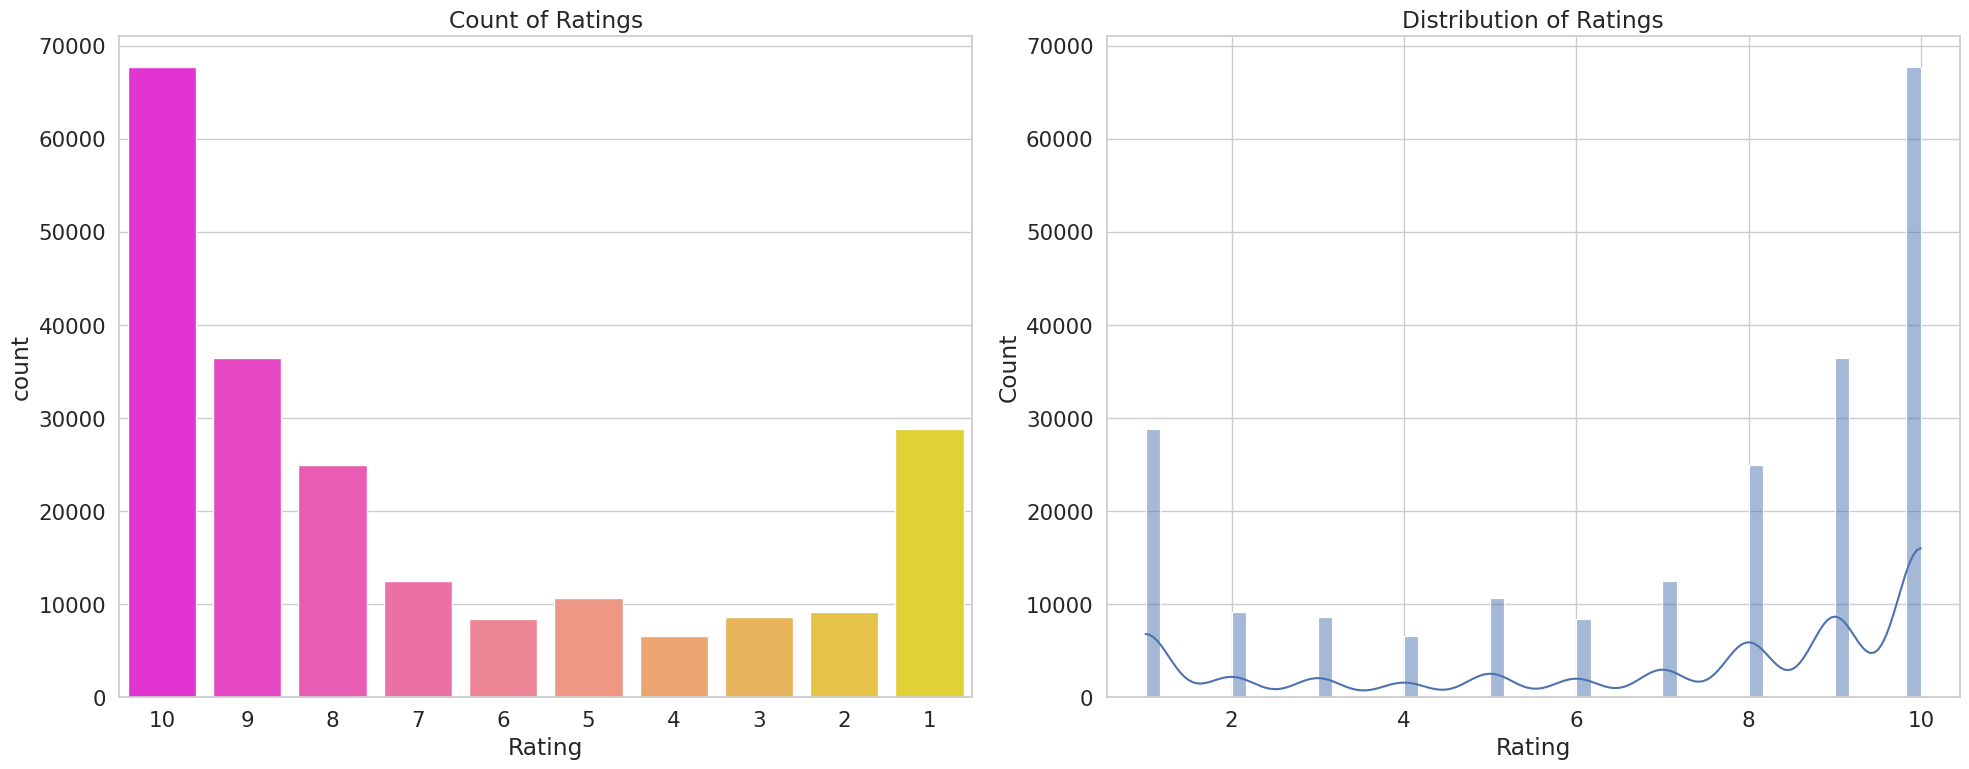

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



plt.rcParams['figure.figsize'] = [20, 8]
sns.set(font_scale=1.4, style='whitegrid')
fig, ax = plt.subplots(1, 2)

# Convert the 'rating' column to a numeric data
df_data['rating'] = pd.to_numeric(df_data['rating'], errors='coerce')

sns_1 = sns.countplot(data=df_data, x='rating', palette='spring', order=list(range(10, 0, -1)), ax=ax[0])
sns_2 = sns.histplot(data=df_data, x='rating', kde=True, ax=ax[1])  # Using histplot instead of distplot (deprecated)

sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

plt.tight_layout()
plt.show()

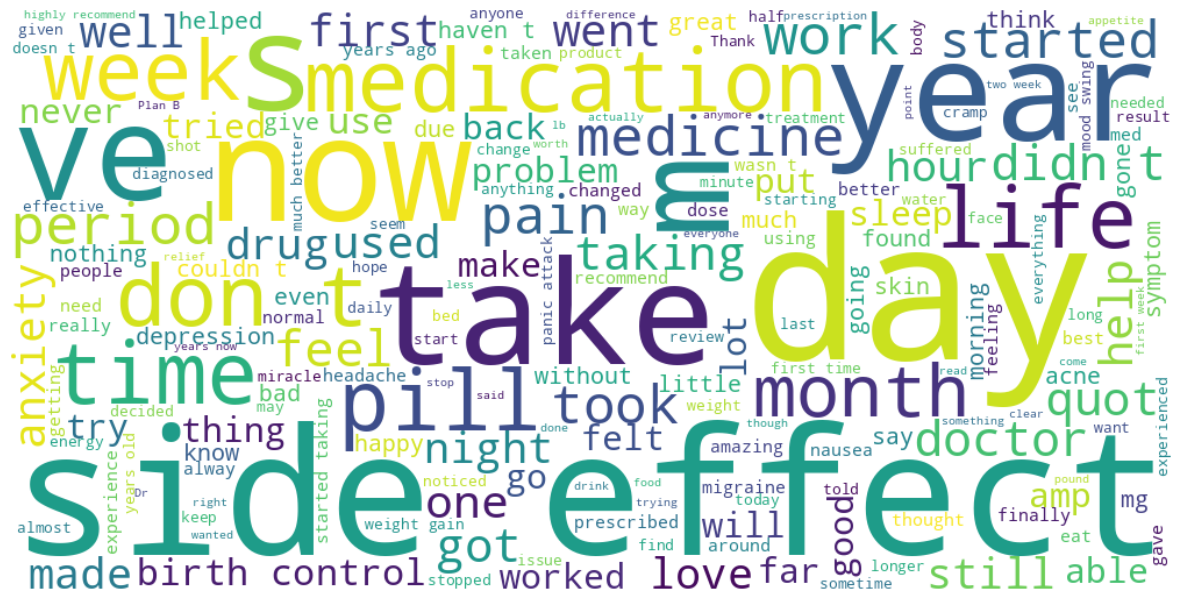

In [17]:
# word cloud of the reviews with rating equal to 10

df_rate_ten = df_data.loc[df_data['rating'] == 10, 'review'] # selecting the reviews with rating equal to 10
k = (' '.join(df_rate_ten)) # joining all the reviews into a single string
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(k) # creating the word cloud
plt.figure(figsize=(15,8)) # setting the figure size
plt.imshow(wordcloud, interpolation="bilinear") # displaying the word cloud
plt.axis("off"); # removing the axis

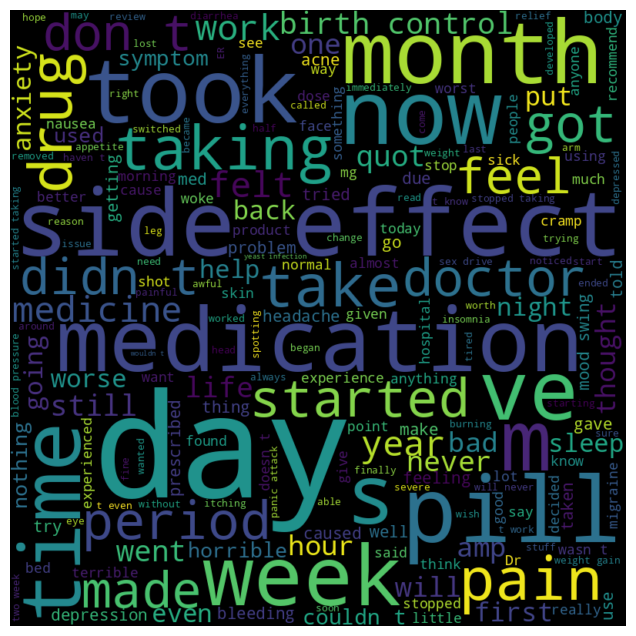

In [18]:
# Word cloud of the reviews with rating eqaul to 1
df_rate_one = df_data.loc[df_data.rating ==1, 'review']
k1 = ' '.join(df_rate_one)
wordcloud = WordCloud(width = 800, height = 800,).generate(k1)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

Text(0.5, 1.0, 'Mean Rating of the Drugs per Year')

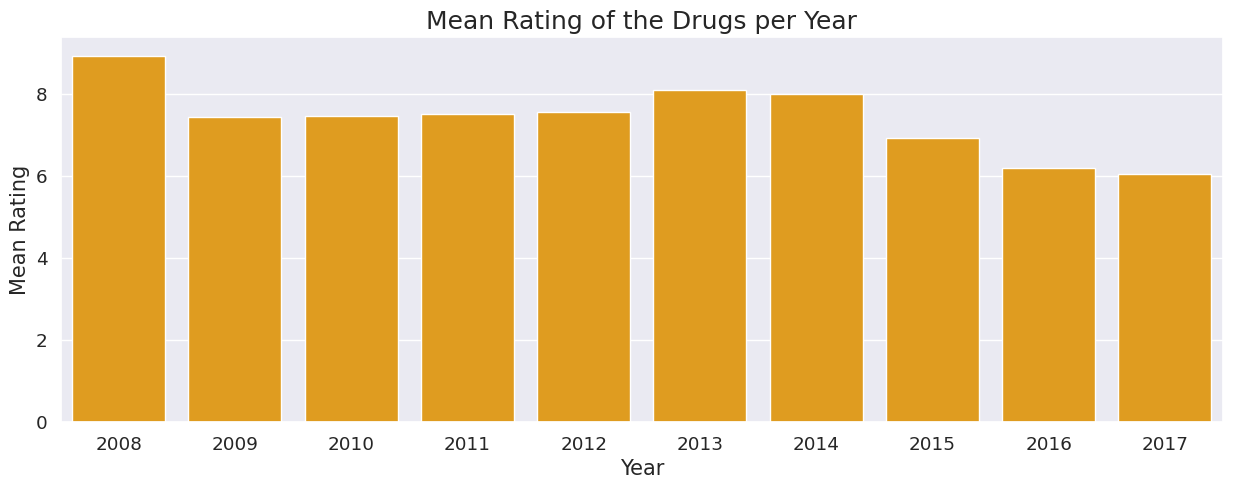

In [19]:
# This barplot shows the mean rating of the drugs per year
# The mean rating of the drugs is calculated by taking the mean of the rating of the drugs per year

mean_rating = dict(df_data.groupby(df_data['date'].dt.year)['rating'].mean())
plt.rcParams['figure.figsize'] = (15, 5)
sns.set(font_scale = 1.2, style='darkgrid')
sns= sns.barplot(x=list(mean_rating.keys()), y=list(mean_rating.values()), color='orange')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Mean Rating', fontsize=15)
plt.title('Mean Rating of the Drugs per Year', fontsize=18)

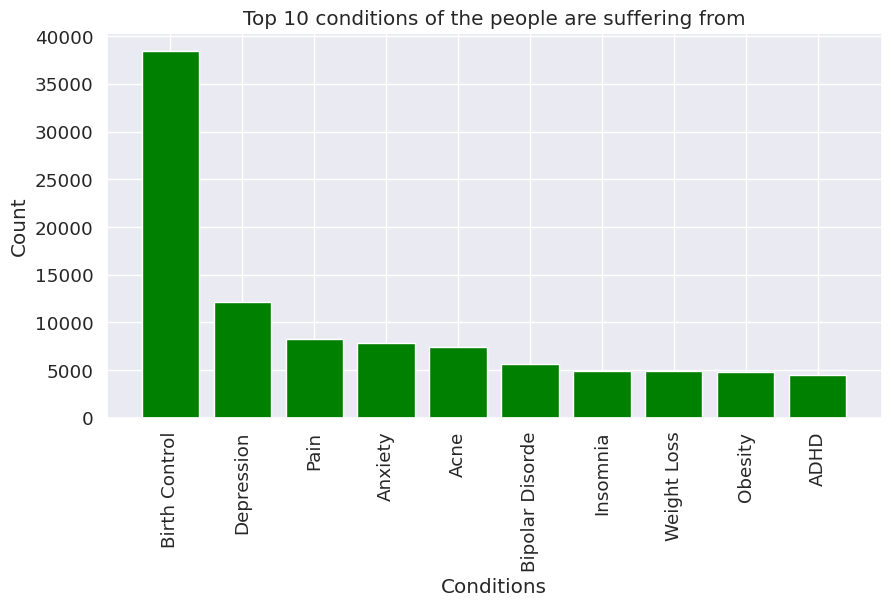

In [20]:
# This barplot show the Top 10 conditions of the people are suffering from.

cond=dict(df_data['condition'].value_counts()) # dict of conditions and their count
cond=dict(sorted(cond.items(), key=lambda x: x[1], reverse=True)) # sorting the dict in descending order
cond=dict(list(cond.items())[0:10]) # slicing the dict to get top 10 conditions
plt.figure(figsize=(10,5))
plt.bar(cond.keys(),cond.values(),color='green')
plt.xticks(rotation=90)
plt.xlabel('Conditions')
plt.ylabel('Count')
plt.title('Top 10 conditions of the people are suffering from')
plt.show()

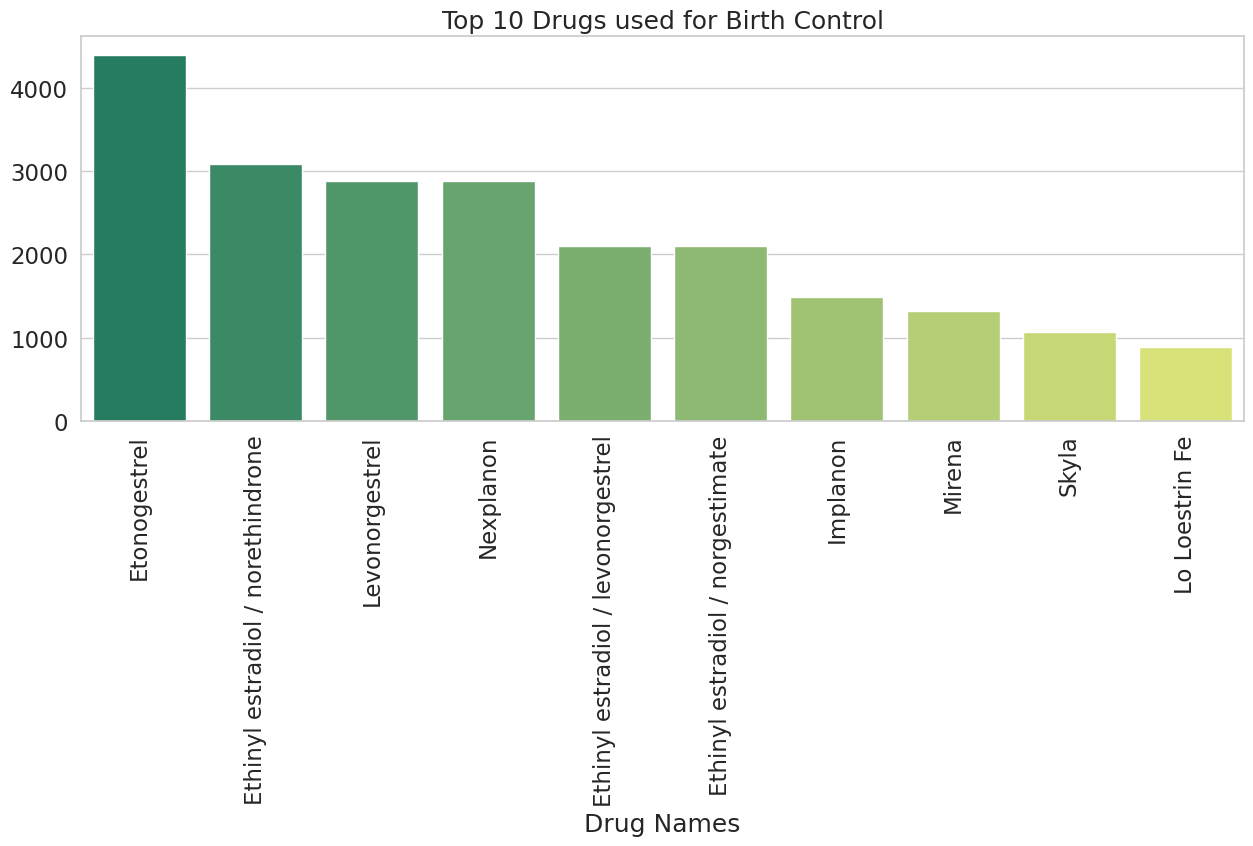

In [21]:
# Top 10 drugs which are used for the Top condition, that is Birth Control
# Top 10 drugs which are used for the top condition, that is Birth Control
import seaborn as sns

df = df_data[df_data['condition'] == 'Birth Control']['drugname'].value_counts()[0: 10]
sns.set(font_scale = 1.5, style = 'whitegrid')
sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

<Axes: xlabel='usefulcount', ylabel='Density'>

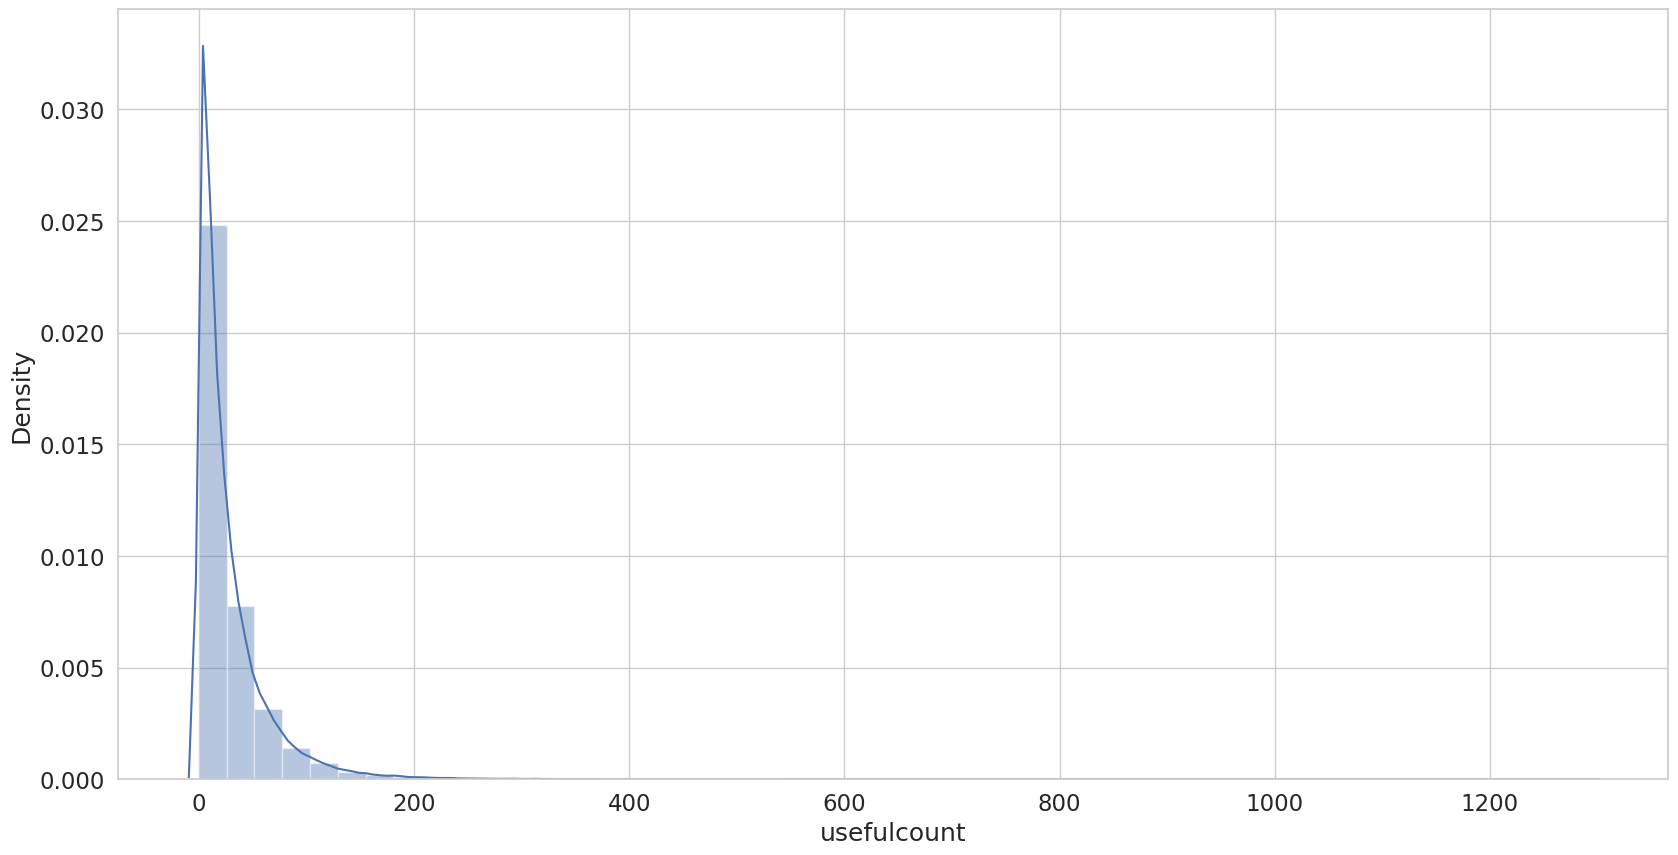

In [22]:
# Distribution of the useful count
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)
plt.rcParams['figure.figsize'] = [20, 10]
sns.distplot(df_data['usefulcount'].dropna())

In [ ]:
df_data.columns

Index(['uniqueid', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount'],
      dtype='object')

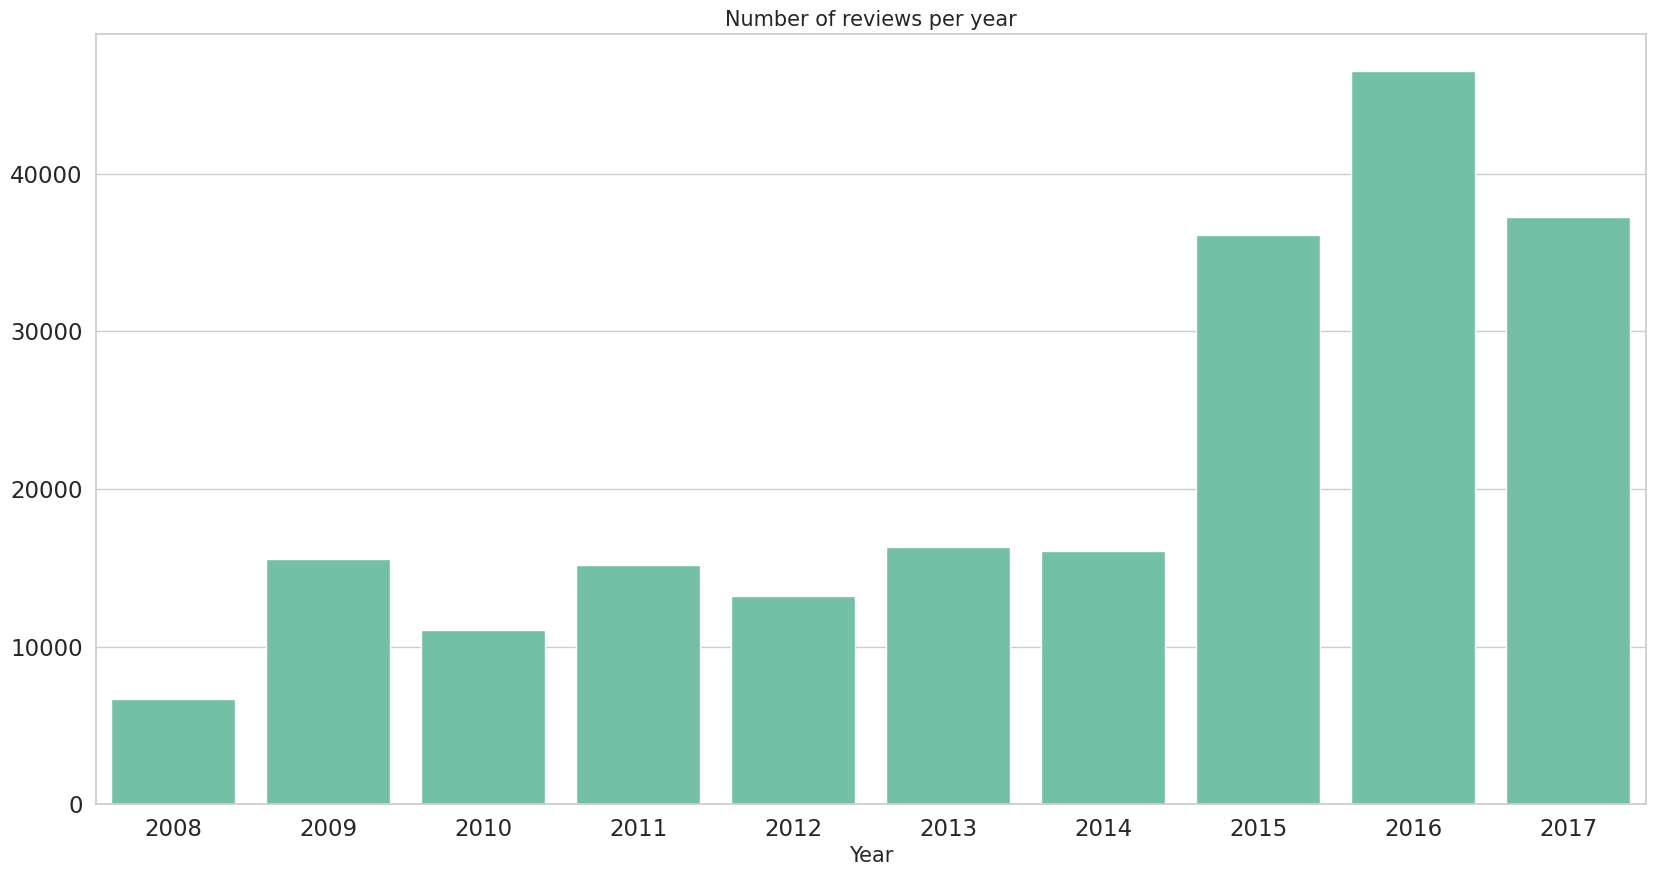

In [23]:
# This barplot shows the number of reviews per year
df_bar = df_data['date'].dt.year.value_counts()
df_bar = df_bar.sort_index()
sns_=sns.barplot(x= df_bar.index, y=df_bar.values,  color='mediumaquamarine')
sns_.set_title('Number of reviews per year', fontsize=15)
sns_.set_xlabel('Year', fontsize=15);

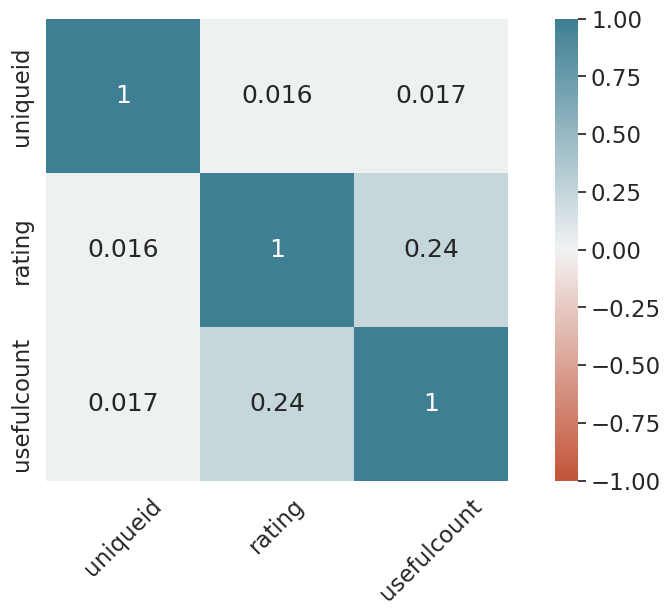

In [24]:
# Heatmap of the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 6) # set the figure size
corr = df_data.select_dtypes(include = ['float64', 'int64']).corr() # select the numerical columns
sns_heat=sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True);  # plot the heatmap
plt.setp(sns_heat.get_xticklabels(), rotation=45); # rotate the x-axis labels to 45 degrees

# Unigrams

In [25]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

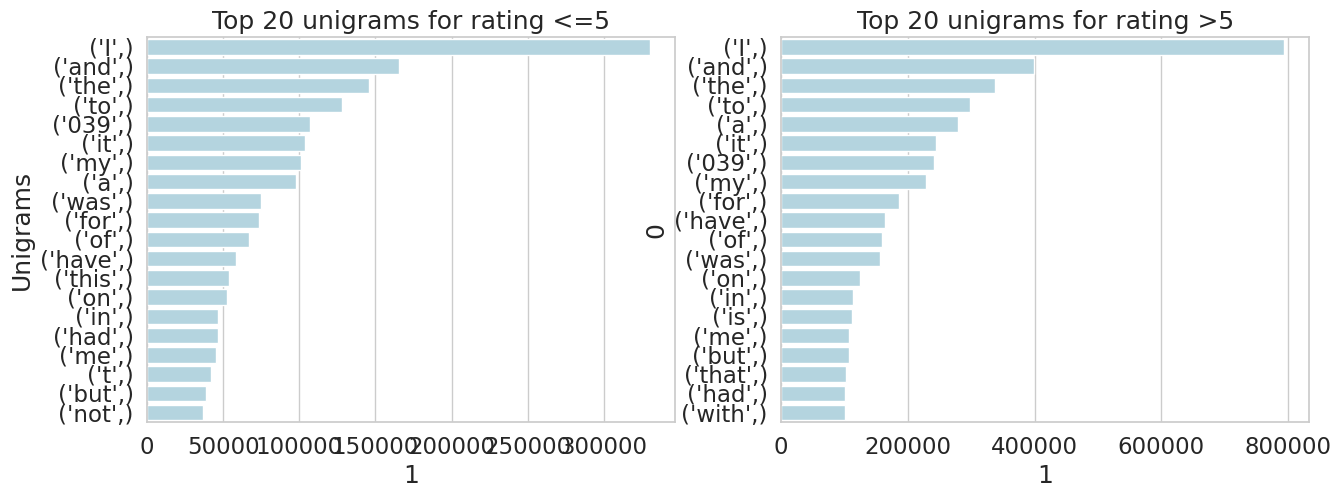

In [26]:
# Top 20 unigrams according to the rating
from nltk import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_ = df_data[['rating', 'review']]
df_['reveiew']= df_data['review'].str.replace("&#039;", "")
df_['review']= df_['review'].str.replace(r'[^\w\d\s]',' ')

df_review_5 = " ".join(df_.loc[df_.rating<=5, 'review'])
df_review_10 = " ".join(df_.loc[df_.rating>5, 'review'])

token_review_5 = word_tokenize(df_review_5)
token_review_10 = word_tokenize(df_review_10)

unigram_5 = ngrams(token_review_5, 1)
unigram_10 = ngrams(token_review_10, 1)

frequency_5 = Counter(unigram_5)
frequency_10 = Counter(unigram_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot for top 20 unigrams for rating  <=5

plt.rcParams['figure.figsize'] = (15, 5)
fig, ax = plt.subplots(1, 2)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_5=sns.barplot(x=df_5[1], y=df_5[0], color='lightblue', ax=ax[0])
sns_10=sns.barplot(x=df_10[1], y=df_10[0], color='lightblue', ax=ax[1])

# Setting axes labels
sns_5.set_title('Top 20 unigrams for rating <=5')
sns_10.set_title('Top 20 unigrams for rating >5')
sns_5.set_ylabel('Unigrams');


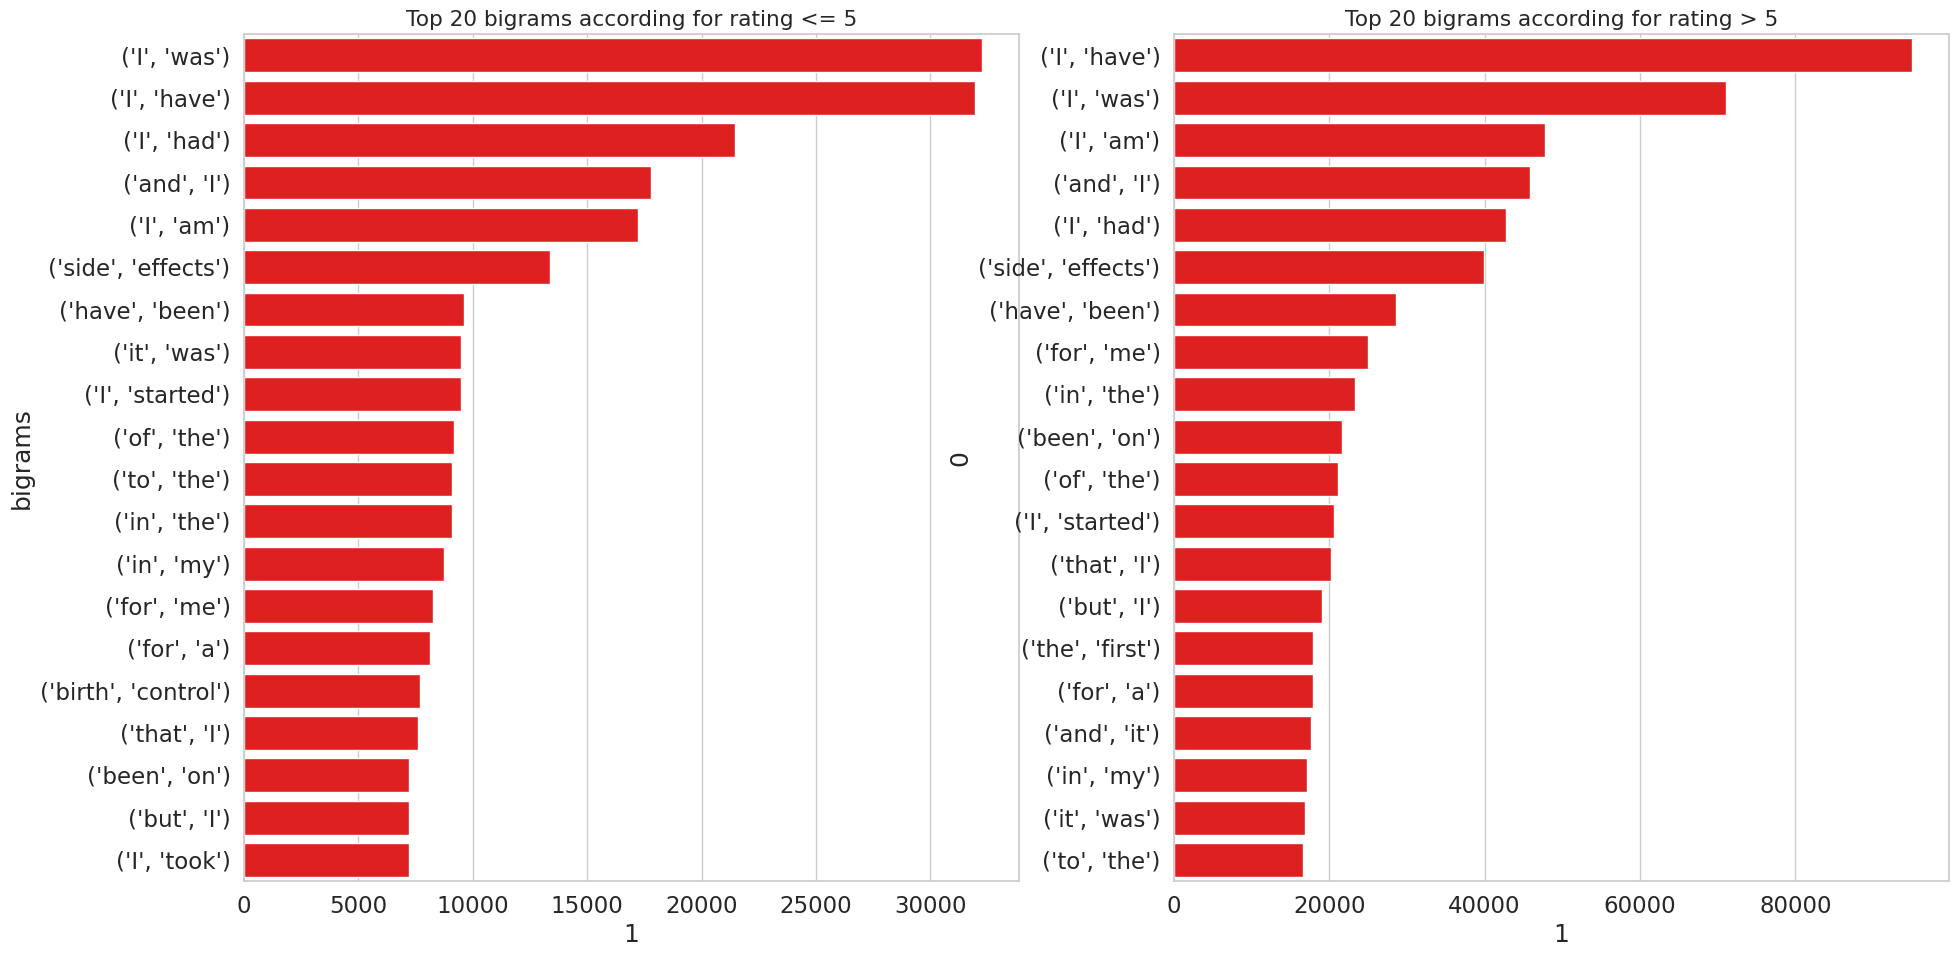

In [27]:
# Top 20 bigrams according to the rating


# Top 20 unigrams according to the rating
df_ = df_data[['rating', 'review']]
df_['review'] = df_data['review'].str.replace("&#039;", "")
df_['review'] = df_['review'].str.replace(r'[^\w\d\s]',' ')

df_review_5 = " ".join(df_.loc[df_.rating <= 5, 'review'])
df_review_10 = " ".join(df_.loc[df_.rating > 5, 'review'])

token_review_5 = word_tokenize(df_review_5)
token_review_10 = word_tokenize(df_review_10)

token_review_10 = word_tokenize(df_review_10)
token_review_5 = word_tokenize(df_review_5)


bigrams_5 = ngrams(token_review_5, 2)
bigrams_10 = ngrams(token_review_10, 2)

frequency_5 = Counter(bigrams_5)
frequency_10 = Counter(bigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 bigrams
plt.rcParams['figure.figsize'] = [22,11]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.3, style = 'whitegrid')

sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'red', ax = ax[0])
sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'red', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 bigrams according for rating <= 5")
sns_10.set_title("Top 20 bigrams according for rating > 5")
sns_5.set_ylabel("bigrams");

# Trigrams

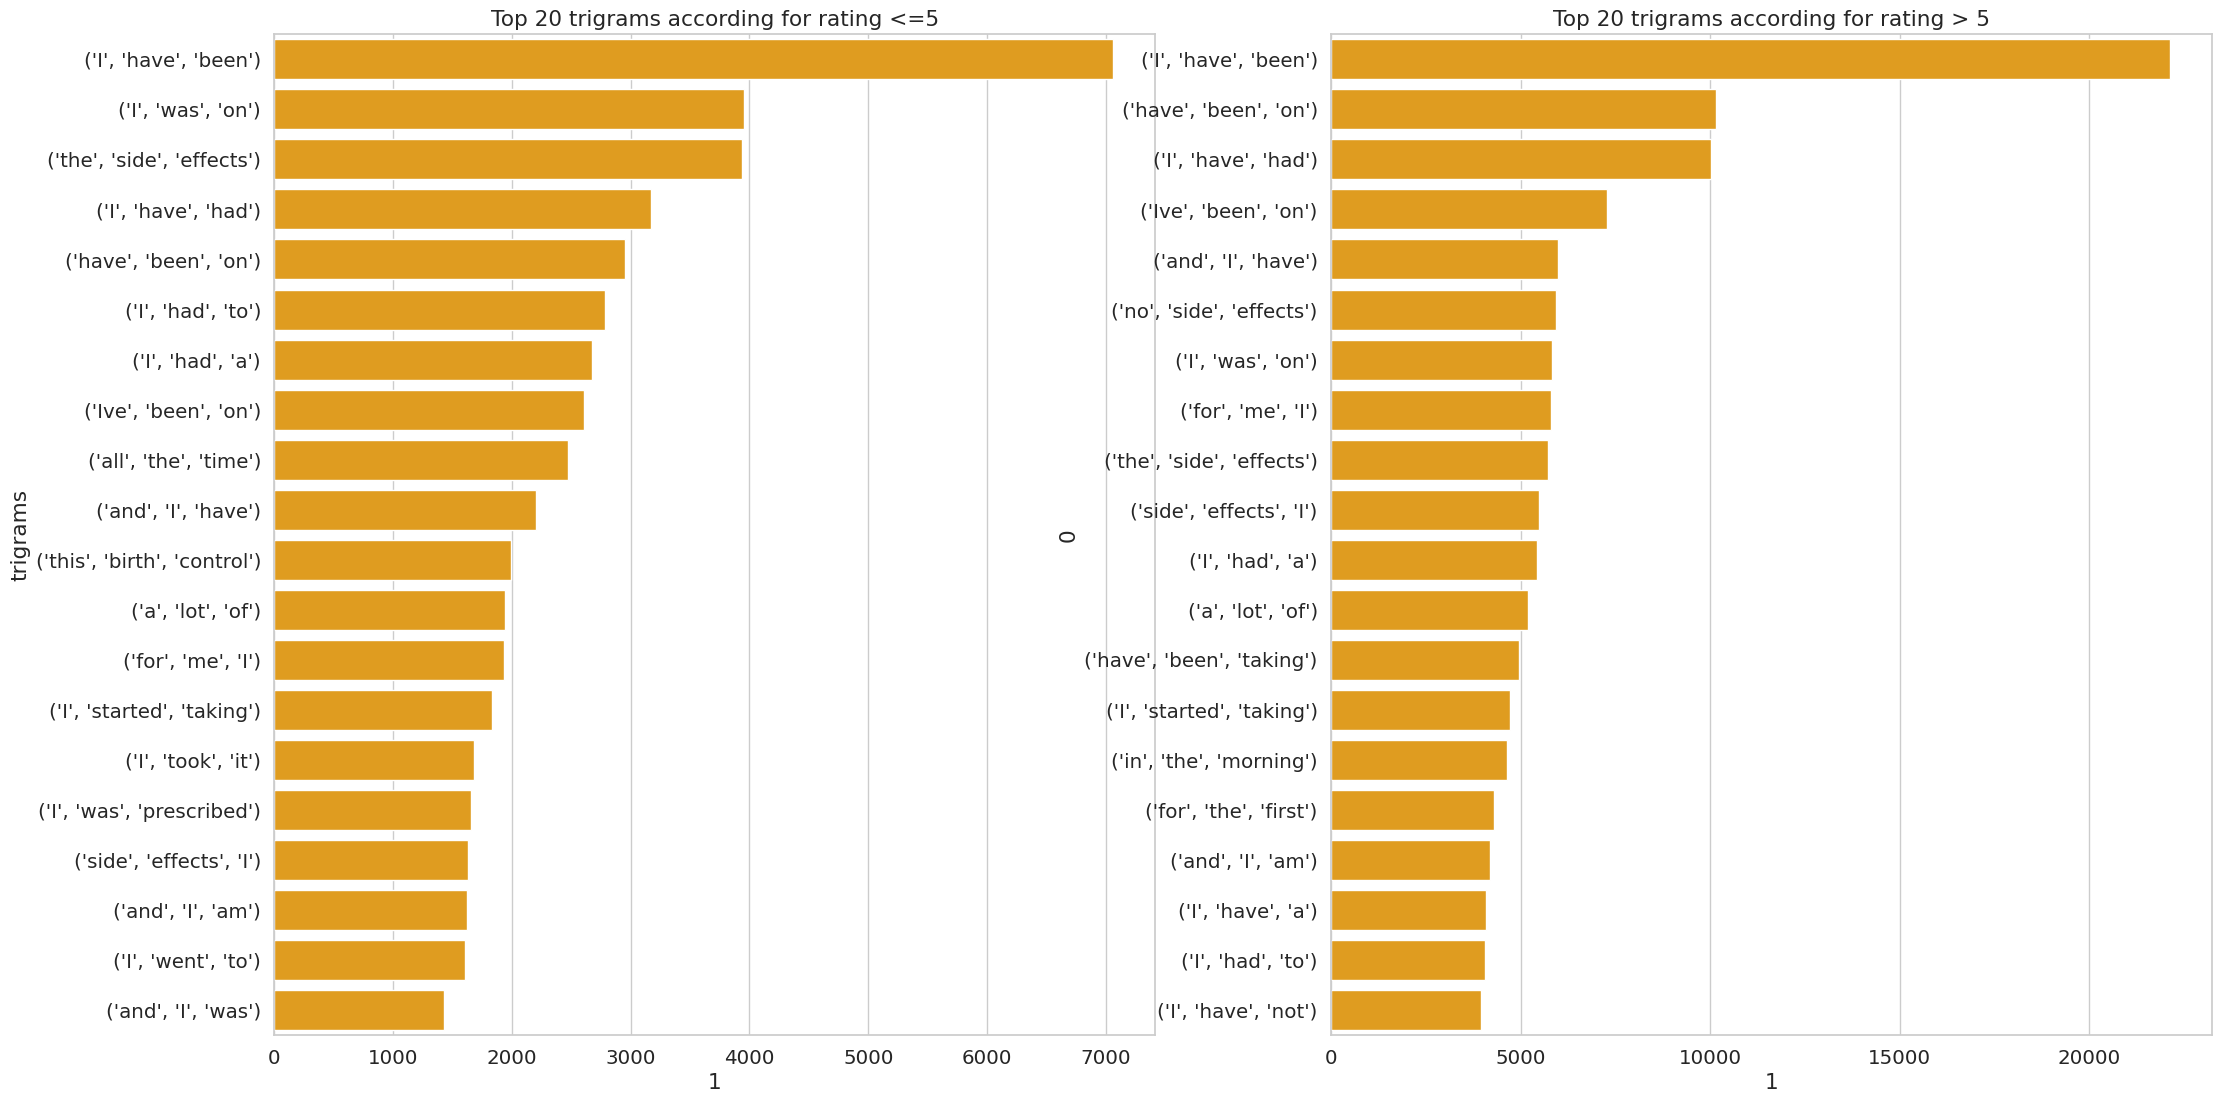

In [28]:
# Top 20 trigrams according to the rating

trigrams_5 = ngrams(token_review_5, 3)
trigrams_10 = ngrams(token_review_10,3)

frequency_5 = Counter(trigrams_5)
frequency_10 = Counter(trigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 trigrams
plt.rcParams['figure.figsize'] = [25, 13]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.3, style='whitegrid')

sns_5 = sns.barplot(x = df_5[1], y=df_5[0], color='orange', ax=ax[0])
sns_10 = sns.barplot(x = df_10[1], y=df_10[0], color='orange', ax=ax[1])

sns_5.set_title("Top 20 trigrams according for rating <=5")
sns_10.set_title("Top 20 trigrams according for rating > 5")
sns_5.set_ylabel("trigrams");

# Word count plot

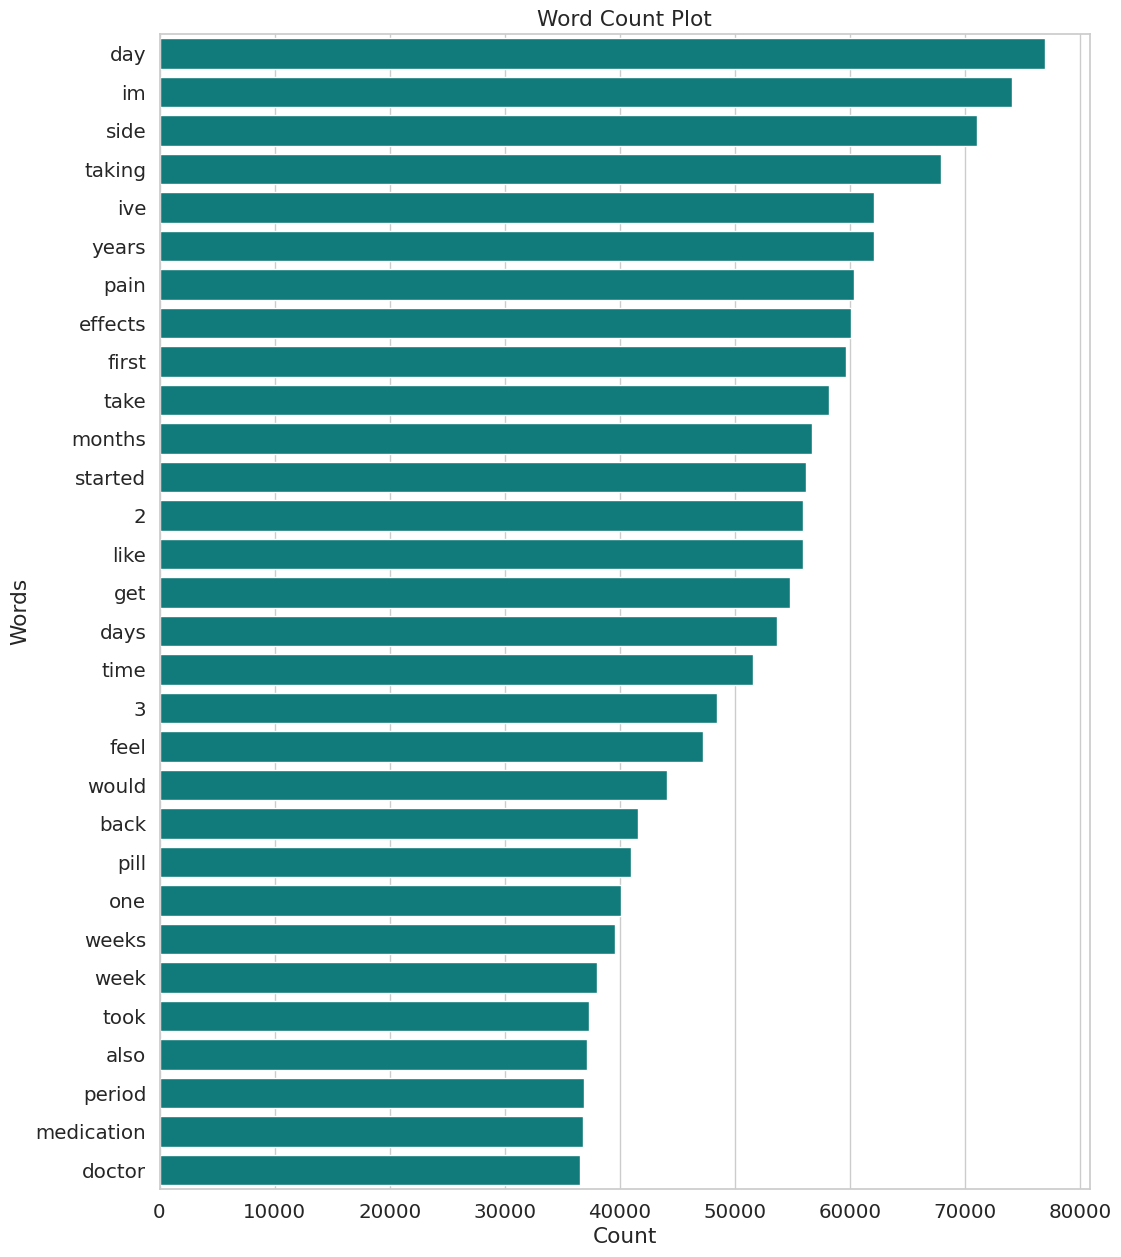

In [29]:

# Removing the stop words before plotting
stop_words = set(stopwords.words('english'))
df_['review'] = df_['review'].str.lower()
df_['review_1'] = df_['review'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
df_review = " ".join(df_['review_1'])
tokenize = word_tokenize(df_review)
frequency = Counter(tokenize)
df = pd.DataFrame(frequency.most_common(30))

plt.rcParams['figure.figsize'] = [12, 15]
sns.set(font_scale = 1.3, style = 'whitegrid')

# plotting
word_count = sns.barplot(x = df[1], y = df[0], color = 'darkcyan')
word_count.set_title("Word Count Plot")
word_count.set_ylabel("Words")
word_count.set_xlabel("Count");

# Preprocessing

In [31]:
# We are going to use the threshold rating of 5 for giving the sentiment.
# The review will have a positive sentiment (1) if rating>5 and negative sentiment otherwise.

In [32]:
# Giving the Sentiment according to the ratings
df_data['sentiment_rate'] = df_data['rating'].apply(lambda x:1 if x>5 else 0)

In [33]:
def review_clean(review):
  lower=review.str.lower()
  #replacing the repeating pattern of &#039;
  pattern_remove = lower.str.replace("&#039;", "")

  #removing all the special characters
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

  #removing all the non ASCII characters
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

  #removing the leading and trailing whitespaces
  whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

  #replacing multiple spaces with single space
  multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

  #replacing two or more dots with one
  dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

  return dataframe

In [34]:
# Contraction Dictionary for the expansion
contractions_dict = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
    "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
    "doesn’t": "does not", "don't": "do not", "don’t": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not",
    "haven't": "have not", "he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
    "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "i would", "i'd've": "i would have",
    "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
    "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not","might've": "might have",
    "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
    "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
    "shan't": "shall not","sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
    "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not",
    "shouldn't've": "should not have", "so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have",
    "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "they'd": "they would",
    "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
    "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
    "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
    "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
    "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
    "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",
    "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y’all": "you all", "y'all'd": "you all would",
    "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have",
    "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", "ain’t": "am not", "aren’t": "are not",
    "can’t": "cannot", "can’t’ve": "cannot have", "’cause": "because", "could’ve": "could have", "couldn’t": "could not", "couldn’t’ve": "could not have",
    "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have",
    "hasn’t": "has not", "haven’t": "have not", "he’d": "he had", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have",
    "he’s": "he is", "how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "how’s": "how is", "i’d": "i would", "i’d’ve": "i would have",
    "i’ll": "i will", "i’ll’ve": "i will have", "i’m": "i am", "i’ve": "i have", "isn’t": "is not", "it’d": "it would", "it’d’ve": "it would have",
    "it’ll": "it will", "it’ll’ve": "it will have", "it’s": "it is", "let’s": "let us", "ma’am": "madam", "mayn’t": "may not",
    "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not",
    "mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock",
    "oughtn’t": "ought not", "oughtn’t’ve": "ought not have", "shan’t": "shall not", "sha’n’t": "shall not", "shan’t’ve": "shall not have",
    "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will", "she’ll’ve": "she will have", "she’s": "she is",
    "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have", "so’ve": "so have", "so’s": "so is",
    "that’d": "that would", "that’d’ve": "that would have", "that’s": "that is", "there’d": "there would", "there’d’ve": "there would have",
    "there’s": "there is", "they’d": "they would", "they’d’ve": "they would have", "they’ll": "they will", "they’ll’ve": "they will have",
    "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would", "we’d’ve": "we would have",
    "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not", "what’ll": "what will",
    "what’ll’ve": "what will have", "what’re": "what are", "what’s": "what is", "what’ve": "what have", "when’s": "when is",
    "when’ve": "when have", "where’d": "where did", "where’s": "where is", "where’ve": "where have", "who’ll": "who will",
    "who’ll’ve": "who will have", "who’s": "who is", "who’ve": "who have","why’s": "why is", "why’ve": "why have", "will’ve": "will have",
    "won’t": "will not", "won’t’ve": "will not have", "would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have",
    "y’all": "you all", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have", "y’all’re": "you all are",
    "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have",
    "you’re": "you are", "you’re": "you are", "you’ve": "you have"
}

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function expand the contractions if there's any
def expand_contractions(s, contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, s)

In [35]:
df_data['review_clean'] = review_clean(df_data['review'])

#expanding the contractions
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: expand_contractions(x))

#removing punctuations
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: ''.join(word for word in x if word not in punctuation))

In [36]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,been n the dep injectin since january 2015 had...
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,im 21 years ld and recently fund ut i might ha...
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,i have been n the sht 11 years and until a mnt...
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,ive had fur shts at this pint i was n birth cn...
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,i had a ttal f 3 shts i gt my first ne befre l...


In [37]:
# Removing the stopwords
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [38]:
# removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [39]:
df_data['review_clean'].head(20)

0     n dep injectin sinc januari 2015 bleed stpped ...
1     im 21 year ld recent fund ut might pcs havent ...
2     n sht 11 year mnth ag never 1 perid r even spt...
3     ive fur shts pint n birth cntrl pill fr year d...
4     ttal f 3 shts gt first ne befr leav hspital gi...
5     hrribl sht gt first sht august ever sinc every...
6     im 18 gt fr heavi bleed ive alway heard bc mak...
7     im 19 heavi pain perid sinc frever gt dep sht ...
8     im 30 year ld wman gt sht n august 9th bleed s...
9     im 17 year ld gt sht august 2015 persnal dnt m...
10    first mnth awesm abslut wnder start light blee...
11    start dep sht year ag rigin bled fr 3 week day...
12    im 24 ive n fr abut 2 year quit perid last abu...
13    im 17 went n dep fr heavi bleed like heavi wul...
14    lved hw cnvenient ne sht everi three mnths lk ...
15    1st sht n sept 2nd nnstp bleed sinc ther side ...
16    tk sht safe im yung teenag sexual activ big pl...
17    ive n sht fr ver 2 year nw amp nt ne cmpla

In [40]:
# separating the day, month and year from the Date
df_data['day'] = df_data['date'].dt.day
df_data['month'] = df_data['date'].dt.month
df_data['year'] = df_data['date'].dt.year

In [41]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,n dep injectin sinc januari 2015 bleed stpped ...,28,10,2015
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,im 21 year ld recent fund ut might pcs havent ...,27,10,2015
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,n sht 11 year mnth ag never 1 perid r even spt...,27,10,2015
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,ive fur shts pint n birth cntrl pill fr year d...,26,10,2015
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,ttal f 3 shts gt first ne befr leav hspital gi...,25,10,2015


In [42]:
def sentiment(review):
  #sentiment polarity of the reveiw
  pol = []
  for i in review:
    analysis = TextBlob(i)
    pol.append(analysis.sentiment.polarity)
  return pol

In [43]:
df_data['sentiment'] = sentiment(df_data['review'])

In [44]:
df_data['sentiment_clean'] = sentiment(df_data['review_clean'])

In [45]:
np.corrcoef(df_data['sentiment'], df_data['rating'])

array([[1.       , 0.3481753],
       [0.3481753, 1.       ]])

The Correlation coefficient between the sentiment of the uncleaned review with rating is greater than the cleaned review, so now lets try without snowball stemmer and without removing the stopwords.

In [46]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
df_data['review_clean_ss'] = review_clean(df_data['review'])
df_data['review_clean_ss'] = df_data['review_clean_ss'].apply(lambda x: expand_contractions(x))
df_data['review_clean_ss'] = df_data['review_clean_ss'].apply(lambda x: ''.join(word for word in x if word not in punctuation))
df_data['sentiment_clean_ss'] = sentiment(df_data['review_clean_ss'])

In [47]:
np.corrcoef(df_data['sentiment_clean_ss'], df_data['rating'])

array([[1.        , 0.25938974],
       [0.25938974, 1.        ]])

In [ ]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year,sentiment,sentiment_clean,review_clean_ss,sentiment_clean_ss
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,n dep injectin sinc januari 2015 bleed stpped ...,28,10,2015,-0.287798,-0.238095,been n the dep injectin since january 2015 had...,-0.228571
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,im 21 year ld recent fund ut might pcs havent ...,27,10,2015,0.175357,0.189286,im 21 years ld and recently fund ut i might ha...,0.222698
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,n sht 11 year mnth ag never 1 perid r even spt...,27,10,2015,-0.210000,0.233333,i have been n the sht 11 years and until a mnt...,-0.075000
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,ive fur shts pint n birth cntrl pill fr year d...,26,10,2015,-0.022500,0.069444,ive had fur shts at this pint i was n birth cn...,0.008333
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,ttal f 3 shts gt first ne befr leav hspital gi...,25,10,2015,0.044872,0.066667,i had a ttal f 3 shts i gt my first ne befre l...,0.058333


# Feature Engineering

In [48]:
# word count in each review
df_data['count_word']=df_data["review_clean_ss"].apply(lambda x: len(str(x).split()))
#unique word count
df_data['count_unique_word']=df_data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))
#punctuation count
df_data["count_punctuations"]=df_data['review'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
df_data["count_words_upper"]=df_data['review'].apply(lambda x:len([w for w in str(x).split() if w.isupper()]))
#title case words count
df_data["count_words_title"]=df_data["review"].apply(lambda x:len([w for w in str(x).split() if w.istitle()]))
#number of stopwords
df_data["count_stopwords"]=df_data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))
#average length of the words
df_data["mean_word_len"]=df_data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#letters
df_data['count_letters']=df_data["review_clean_ss"].apply(lambda x: len(str(x)))

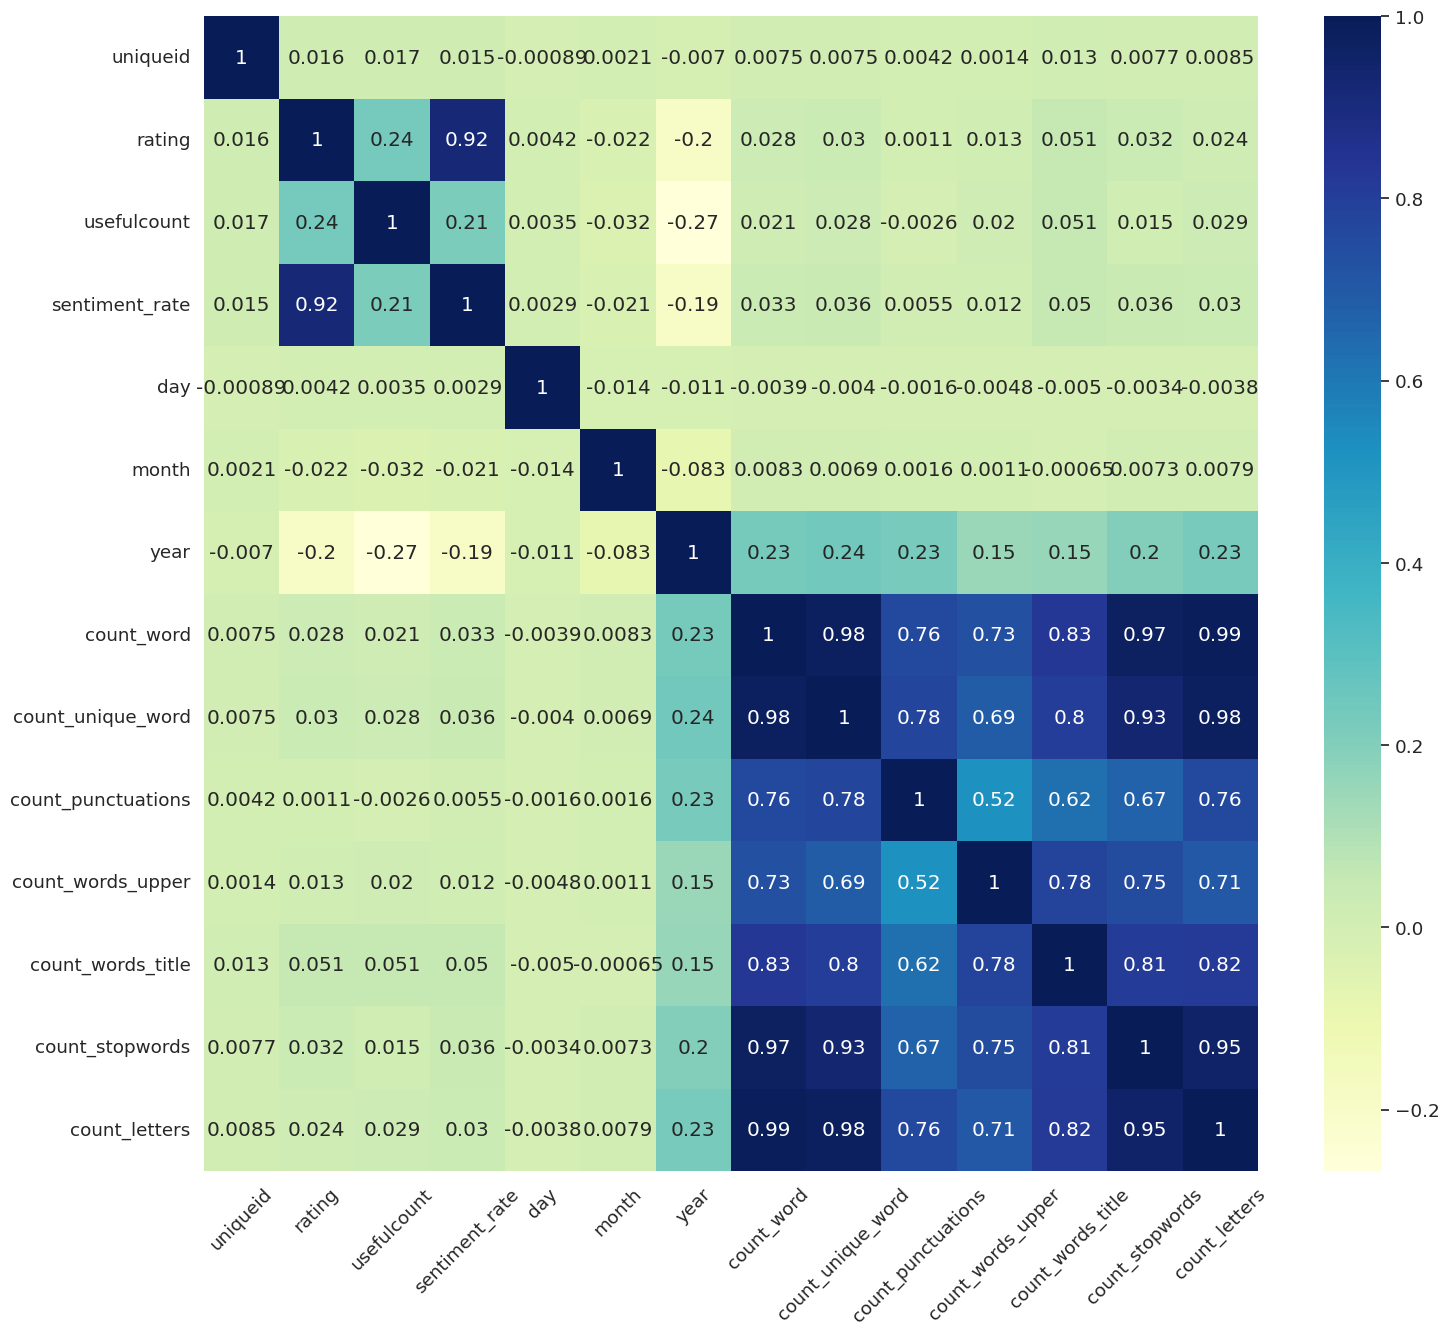

In [49]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17, 15]
sns.set(font_scale=1.2)
corr = df_data.select_dtypes(include='int64').corr()
sns_ = sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.setp(sns_.get_xticklabels(), rotation=45);

In [50]:
# label encoding drugname and conditions
label_encoder_feat ={}
for feature in ['drugname', 'condition']:
  label_encoder_feat[feature] = LabelEncoder()
  df_data[feature] = label_encoder_feat[feature].fit_transform(df_data[feature])

# Modelling

In [ ]:
df_data.columns

Index(['uniqueid', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount', 'sentiment_rate', 'review_clean', 'day', 'month', 'year',
       'sentiment', 'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'count_word', 'count_unique_word', 'count_punctuations',
       'count_words_upper', 'count_words_title', 'count_stopwords',
       'mean_word_len'],
      dtype='object')

In [51]:
#Defining Features and splitting the data as train and test set
features = df_data[['condition', 'usefulcount', 'sentiment', 'day', 'month', 'year', 'sentiment_clean_ss', 'count_word',
                     'count_unique_word', 'count_letters', 'count_punctuations', 'count_words_upper', 'count_words_title',
                     'count_stopwords', 'mean_word_len']]
target=df_data['sentiment_rate']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
print("The Train set size", X_train.shape)
print("The Test set size", X_test.shape)

The Train set size (149708, 15)
The Test set size (64161, 15)


In [53]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 13.9 MB/s eta 0:00:00


In [54]:
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [55]:
# Training Model
clf = LGBMClassifier(n_estimators=10000, learning_rate=0.10, num_leaves=30, subsample=.9,max_depth=7,reg_alpha=.1, reg_lambda=.1,
                     min_split_gain=.01, min_child_weight=2, silent=-1, verbose=-1,)
model = clf.fit(X_train, y_train)
predictions = model.predict(X_test)
print("The Accuracy of the model is :", accuracy_score(y_test, predictions), '\n')
print("The Confusion Matrix is \n")
print(confusion_matrix(y_test, predictions), '\n')

print(classification_report(y_test, predictions))

The Accuracy of the model is : 0.8879693271613597 

The Confusion Matrix is 

[[14751  4594]
 [ 2594 42222]] 

              precision    recall  f1-score   support

           0       0.85      0.76      0.80     19345
           1       0.90      0.94      0.92     44816

    accuracy                           0.89     64161
   macro avg       0.88      0.85      0.86     64161
weighted avg       0.89      0.89      0.89     64161



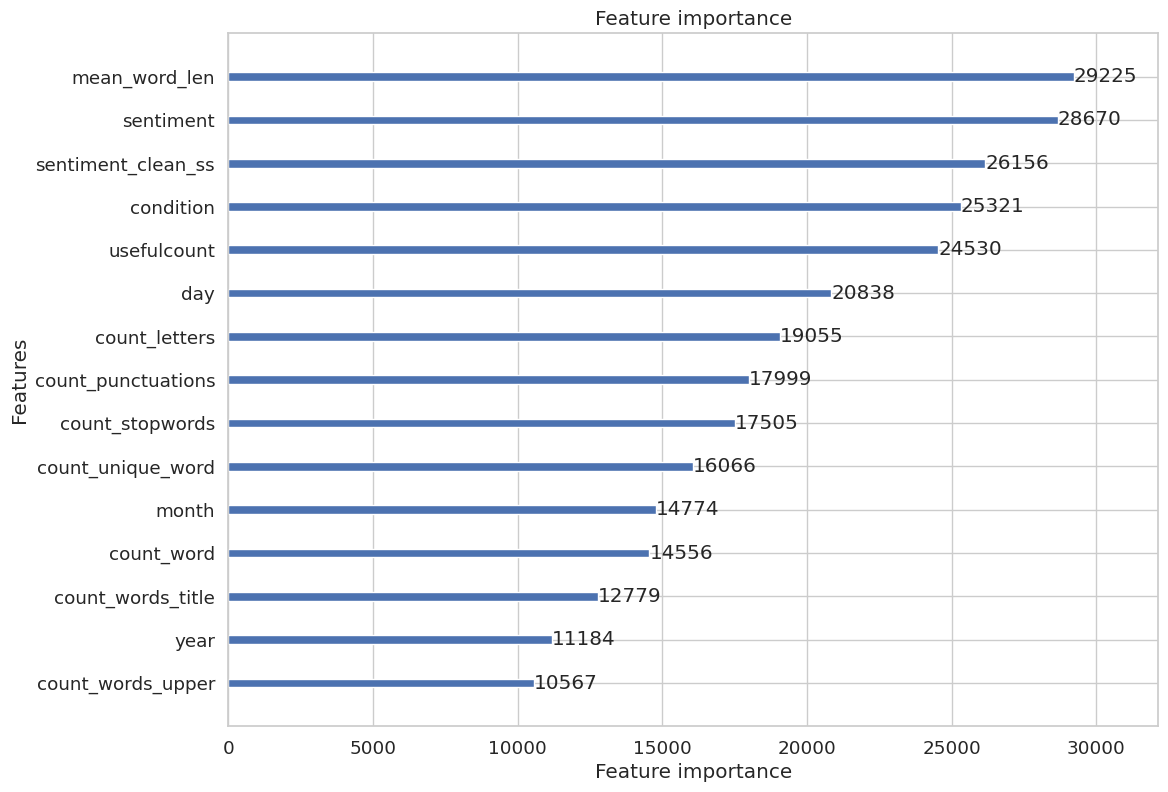

In [56]:
# Feature importance
plt.rcParams['figure.figsize'] =[12,9]
sns.set(style='whitegrid', font_scale=1.2)
plot_importance(model);

Training Model -II

In [58]:
#XGBClassifier
xgb_clf= XGBClassifier(n_estimator=10000, learning_rate=0.10, num_leaves=30)
model_xgb= xgb_clf.fit(X_train, y_train)

#predictions
predictions_2= model_xgb.predict(X_test)
print("The accuracy of the model is :", accuracy_score(y_test, predictions_2), '\n')
print("The confusion matrix is \n")
print(confusion_matrix(y_test, predictions_2), '\n')

print(classification_report(y_test, predictions_2))


[13:34:42] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator", "num_leaves" } are not used.

The accuracy of the model is : 0.7674599834790605 

The confusion matrix is 

[[ 8115 11230]
 [ 3690 41126]] 

              precision    recall  f1-score   support

           0       0.69      0.42      0.52     19345
           1       0.79      0.92      0.85     44816

    accuracy                           0.77     64161
   macro avg       0.74      0.67      0.68     64161
weighted avg       0.76      0.77      0.75     64161



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

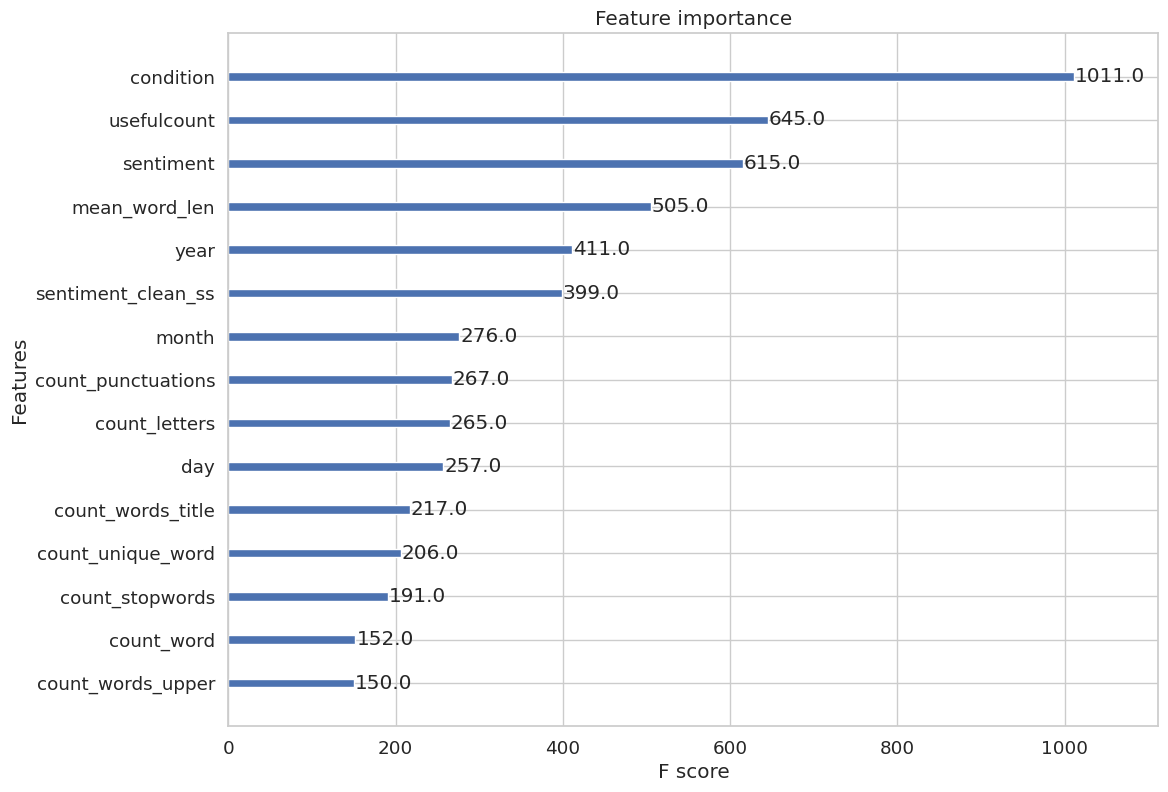

In [61]:
# Feature Importance Plot using XGBClassifier
from xgboost import plot_importance
plt.rcParams['figure.figsize'] =[12, 9]
plot_importance(model_xgb)

Research XGBoost classifier & Model Explainability

Model -III CatboostClassifier

In [62]:
cat_clf=CatBoostClassifier(iterations=1000, learning_rate=0.5)
model_cat = cat_clf.fit(X_train, y_train)

0:	learn: 0.5611522	total: 68.8ms	remaining: 1m 8s
1:	learn: 0.5265434	total: 84.9ms	remaining: 42.4s
2:	learn: 0.5149566	total: 103ms	remaining: 34.1s
3:	learn: 0.5117050	total: 119ms	remaining: 29.7s
4:	learn: 0.5084605	total: 136ms	remaining: 27s
5:	learn: 0.5037719	total: 156ms	remaining: 25.8s
6:	learn: 0.5018556	total: 177ms	remaining: 25.1s
7:	learn: 0.5005914	total: 196ms	remaining: 24.3s
8:	learn: 0.4995240	total: 215ms	remaining: 23.7s
9:	learn: 0.4978684	total: 234ms	remaining: 23.2s
10:	learn: 0.4967814	total: 253ms	remaining: 22.8s
11:	learn: 0.4961156	total: 276ms	remaining: 22.7s
12:	learn: 0.4943710	total: 294ms	remaining: 22.3s
13:	learn: 0.4938226	total: 321ms	remaining: 22.6s
14:	learn: 0.4926010	total: 339ms	remaining: 22.2s
15:	learn: 0.4919192	total: 358ms	remaining: 22s
16:	learn: 0.4912396	total: 381ms	remaining: 22s
17:	learn: 0.4906976	total: 401ms	remaining: 21.9s
18:	learn: 0.4902987	total: 422ms	remaining: 21.8s
19:	learn: 0.4900277	total: 441ms	remaining: 

In [63]:
# Predictions
predictions_3 =  model_cat.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_3), '\n')
print ("The confusion Matrix is \n")
print (confusion_matrix(y_test, predictions_3), '\n')

print (classification_report(y_test, predictions_3))

The Accuracy of the model is :  0.8080765574102649 

The confusion Matrix is 

[[10999  8346]
 [ 3968 40848]] 

              precision    recall  f1-score   support

           0       0.73      0.57      0.64     19345
           1       0.83      0.91      0.87     44816

    accuracy                           0.81     64161
   macro avg       0.78      0.74      0.76     64161
weighted avg       0.80      0.81      0.80     64161



Research Catboost & Model Explainability